<a href="https://colab.research.google.com/github/Paulinohpp/Analise-de-Dados/blob/main/Projeto_Airbnb_Paulo_Paulino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON PARA ANÁLISE DE DADOS**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Período: Semana 6 - ETL

Professor: Franciane Rodrigues

Aluno: Paulo Paulino



**Pergunta de negócio:**

Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

**Nível - Tratamento e Análise**

* Verificar todos os passos da estratégia geral de análise de dados;
* Executar o que for necessário;
* Todos os passos devem ser comentados;
* Realizar no mínimo 3 análises apenas numéricas;
* Realizar plotagens para no mínimo 3 análises;
* Chegar a uma conclusão de sua análise;

**Nivel Infra**

* O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado)
* O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado) (será mostrado em aula!)

**O que será analisado:**

* Pontualidade;
* Organização de código;
* Atendimento aos requisitos;
* Capacidade de Pesquisa e Autonomia;
* Aplicação da Estratégia Geral de Análise de Dados;

**Observação:** Em caso de algum(ns) itens não forem contemplados, realize a entrega do que foi concluído com justificativa. Em momento oportuno, solicitaremos acesso aos ambientes em nuvem do projeto.

Link de apoio: https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe

In [ ]:
#Instalação dos pacotes e bibliotecas.
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install pandera

In [ ]:
# Importando pacotes e bibliotecas.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandera as pa
import seaborn as sns
from google.colab import drive
from google.cloud import storage

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Conexão com o Drive do google
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho onde o arquivo se encontra no Google Drive.
#path = '/content/drive/MyDrive/CURSO ANALISE DE DADOS/airbnb.csv'

**Google Cloud**

*   Documentação: https://cloud.google.com/docs/authentication?hl=pt-br

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/proud-curve-389812-9ef866b3c49e.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projeto_airbnb_07_07_2023')
bucket.blob('airbnb.csv')
path = 'gs://projeto_airbnb_07_07_2023/Airbnb/Bruto/airbnb.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=';',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback = df.copy()

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Renomando os atributos da tabela.
novo_nome = {
    "Unnamed: 0": "ID",
    "realSum": "Total",
    "room_type": "Tipo de Quarto",
    "room_shared": "Compartilhado",
    "room_private": "Privado",
    "person_capacity": "Capacidade de Pessoas",
    "host_is_superhost": "Superhost",
    "multi": "Multi",
    "biz": "Biz",
    "cleanliness_rating": "Avaliação de Limpeza",
    "guest_satisfaction_overall": "Satisfação Geral dos Hóspedes",
    "bedrooms": "Número de Quartos",
    "dist": "Distância",
    "metro_dist": "Distância até o Metrô",
    "attr_index": "Índice de Atrações",
    "attr_index_norm": "Índice de Atrações Normalizado",
    "rest_index": "Índice de Restaurantes",
    "rest_index_norm": "Índice de Restaurantes Normalizado",
    "lng": "Longitude",
    "lat": "Latitude"
}

df = df.rename(columns=novo_nome)

In [ ]:
print(df.columns)


Index(['ID', 'Total', 'Tipo de Quarto', 'Compartilhado', 'Privado',
       'Capacidade de Pessoas', 'Superhost', 'Multi', 'Biz',
       'Avaliação de Limpeza', 'Satisfação Geral dos Hóspedes',
       'Número de Quartos', 'Distância', 'Distância até o Metrô',
       'Índice de Atrações', 'Índice de Atrações Normalizado',
       'Índice de Restaurantes', 'Índice de Restaurantes Normalizado',
       'Longitude', 'Latitude'],
      dtype='object')


In [ ]:
# Transformar o nome das colunas em minúsculo
df.columns = df.columns.str.lower()

# Transformar o nome das categorias em maiúsculo
df['tipo de quarto'] = df['tipo de quarto'].str.upper()

In [ ]:
df.dtypes

id                                      int64
total                                 float64
tipo de quarto                         object
compartilhado                            bool
privado                                  bool
capacidade de pessoas                 float64
superhost                                bool
multi                                   int64
biz                                     int64
avaliação de limpeza                  float64
satisfação geral dos hóspedes         float64
número de quartos                       int64
distância                             float64
distância até o metrô                 float64
índice de atrações                    float64
índice de atrações normalizado        float64
índice de restaurantes                float64
índice de restaurantes normalizado    float64
longitude                             float64
latitude                              float64
dtype: object

In [ ]:
df

,id,total,tipo de quarto,compartilhado,privado,capacidade de pessoas,superhost,multi,biz,avaliação de limpeza,satisfação geral dos hóspedes,número de quartos,distância,distância até o metrô,índice de atrações,índice de atrações normalizado,índice de restaurantes,índice de restaurantes normalizado,longitude,latitude
0,0,194.033698,PRIVATE ROOM,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,PRIVATE ROOM,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,PRIVATE ROOM,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,PRIVATE ROOM,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,PRIVATE ROOM,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,ENTIRE HOME/APT,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,PRIVATE ROOM,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,PRIVATE ROOM,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,ENTIRE HOME/APT,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1103 non-null   int64  
 1   total                               1103 non-null   float64
 2   tipo de quarto                      1103 non-null   object 
 3   compartilhado                       1103 non-null   bool   
 4   privado                             1103 non-null   bool   
 5   capacidade de pessoas               1103 non-null   float64
 6   superhost                           1103 non-null   bool   
 7   multi                               1103 non-null   int64  
 8   biz                                 1103 non-null   int64  
 9   avaliação de limpeza                1103 non-null   float64
 10  satisfação geral dos hóspedes       1103 non-null   float64
 11  número de quartos                   1103 no

In [ ]:
# Usando o metodo unique() para verificar quais voleres tem na coluna 'tipo_quarto'
df['tipo de quarto'].unique()

array(['PRIVATE ROOM', 'ENTIRE HOME/APT', 'SHARED ROOM'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1103 non-null   int64  
 1   total                               1103 non-null   float64
 2   tipo de quarto                      1103 non-null   object 
 3   compartilhado                       1103 non-null   bool   
 4   privado                             1103 non-null   bool   
 5   capacidade de pessoas               1103 non-null   float64
 6   superhost                           1103 non-null   bool   
 7   multi                               1103 non-null   int64  
 8   biz                                 1103 non-null   int64  
 9   avaliação de limpeza                1103 non-null   float64
 10  satisfação geral dos hóspedes       1103 non-null   float64
 11  número de quartos                   1103 no

In [ ]:
# Mapeamento das traduções
traducoes = {
    'PRIVATE ROOM': 'QUARTO PRIVADO',
    'ENTIRE HOME/APT': 'APARTAMENTO INTEIRO',
    'SHARED ROOM': 'QUARTO COMPARTILHADO'
}

# Função para realizar a tradução
def traduzir(texto):
    return traducoes.get(texto, texto)

# Traduzir os nomes nas linhas da coluna 'tipo de quarto'
df['tipo de quarto'] = df['tipo de quarto'].map(traduzir)

In [ ]:
df

,id,total,tipo de quarto,compartilhado,privado,capacidade de pessoas,superhost,multi,biz,avaliação de limpeza,satisfação geral dos hóspedes,número de quartos,distância,distância até o metrô,índice de atrações,índice de atrações normalizado,índice de restaurantes,índice de restaurantes normalizado,longitude,latitude
0,0,194.033698,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,QUARTO PRIVADO,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,QUARTO PRIVADO,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,QUARTO PRIVADO,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,QUARTO PRIVADO,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,APARTAMENTO INTEIRO,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,APARTAMENTO INTEIRO,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1103 non-null   int64  
 1   total                               1103 non-null   float64
 2   tipo de quarto                      1103 non-null   object 
 3   compartilhado                       1103 non-null   bool   
 4   privado                             1103 non-null   bool   
 5   capacidade de pessoas               1103 non-null   float64
 6   superhost                           1103 non-null   bool   
 7   multi                               1103 non-null   int64  
 8   biz                                 1103 non-null   int64  
 9   avaliação de limpeza                1103 non-null   float64
 10  satisfação geral dos hóspedes       1103 non-null   float64
 11  número de quartos                   1103 no

In [ ]:
# Examinar as primeiras linhas do DataFrame:
print(df.head())

   id       total  tipo de quarto  compartilhado  privado  \
0   0  194.033698  QUARTO PRIVADO          False     True   
1   1  344.245776  QUARTO PRIVADO          False     True   
2   2  264.101422  QUARTO PRIVADO          False     True   
3   3  433.529398  QUARTO PRIVADO          False     True   
4   4  485.552926  QUARTO PRIVADO          False     True   

   capacidade de pessoas  superhost  multi  biz  avaliação de limpeza  \
0                    2.0      False      1    0                  10.0   
1                    4.0      False      0    0                   8.0   
2                    2.0      False      0    1                   9.0   
3                    4.0      False      0    1                   9.0   
4                    2.0       True      0    0                  10.0   

   satisfação geral dos hóspedes  número de quartos  distância  \
0                           93.0                  1   5.022964   
1                           85.0                  1   0.488389

In [ ]:
# Verificando estatísticas descritivas dos dados numéricos:
print(df.describe())

                id        total  capacidade de pessoas       multi  \
count  1103.000000  1103.000000            1103.000000  1103.00000   
mean    551.000000   545.020526               2.792384     0.30825   
std     318.552978   416.974314               1.044151     0.46198   
min       0.000000   128.887118               2.000000     0.00000   
25%     275.500000   309.797764               2.000000     0.00000   
50%     551.000000   430.248635               2.000000     0.00000   
75%     826.500000   657.324303               4.000000     1.00000   
max    1102.000000  7782.907225               6.000000     1.00000   

               biz  avaliação de limpeza  satisfação geral dos hóspedes  \
count  1103.000000           1103.000000                    1103.000000   
mean      0.115141              9.461469                      94.362647   
std       0.319336              0.798201                       6.089691   
min       0.000000              4.000000                      20.0000

In [ ]:
#Contar os valores únicos em uma coluna:
print(df['tipo de quarto'].value_counts())

QUARTO PRIVADO          559
APARTAMENTO INTEIRO     538
QUARTO COMPARTILHADO      6
Name: tipo de quarto, dtype: int64


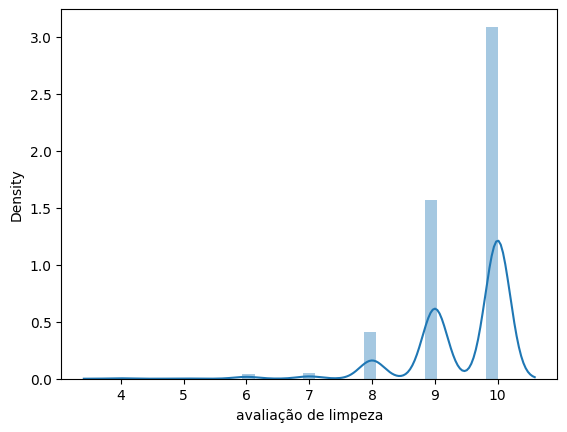

In [ ]:
# Visualizando a distribuição de uma variável numérica:
sns.distplot(df['avaliação de limpeza'])
plt.show()

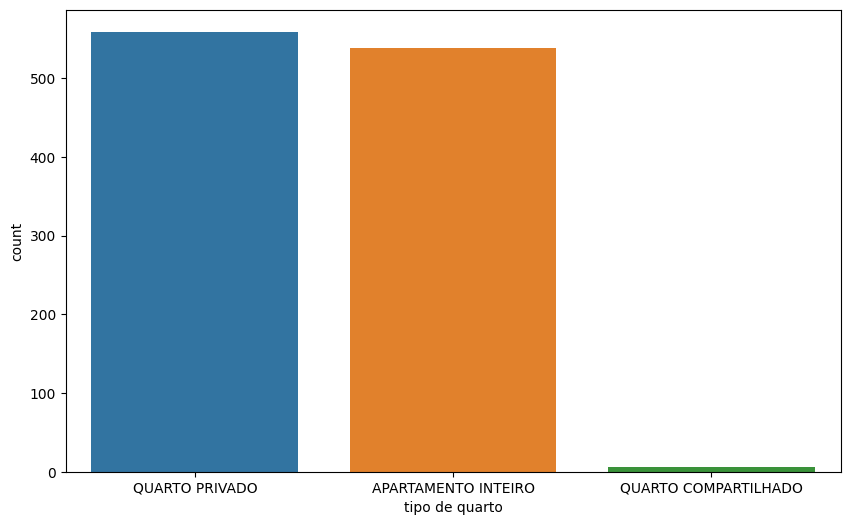

In [ ]:
#Criar um gráfico de barras para uma variável categórica:
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo de quarto', data=df)
plt.show()

In [ ]:
#Calcular a correlação entre as variáveis numéricas:
correlation = df.corr()
print(correlation)

                                          id     total  compartilhado  \
id                                  1.000000 -0.022390       0.024814   
total                              -0.022390  1.000000      -0.046853   
compartilhado                       0.024814 -0.046853       1.000000   
privado                            -0.021909 -0.433549      -0.074968   
capacidade de pessoas              -0.005527  0.526992      -0.008908   
superhost                          -0.023852 -0.063118       0.006581   
multi                               0.007350 -0.104973       0.030710   
biz                                -0.015575 -0.026808      -0.026678   
avaliação de limpeza               -0.022184  0.022938      -0.027327   
satisfação geral dos hóspedes      -0.031362  0.136025      -0.018581   
número de quartos                  -0.022772  0.491703      -0.028276   
distância                          -0.005356 -0.258692       0.039411   
distância até o metrô               0.012942 -0.142

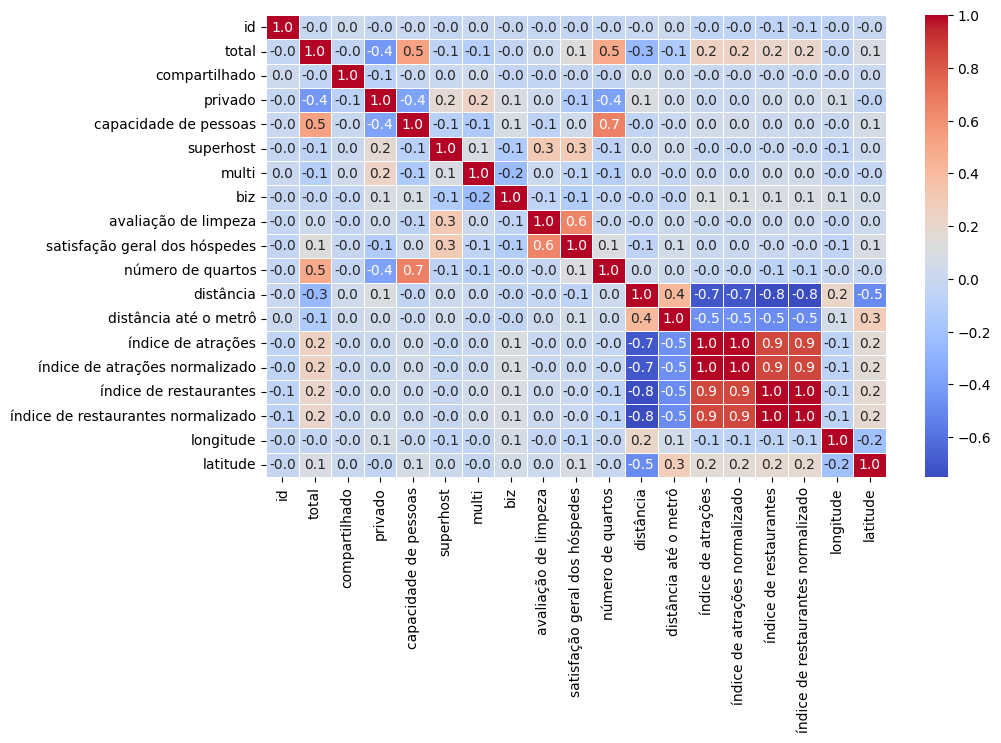

In [ ]:
#Visualizar a matriz de correlação em um mapa de calor:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.7, cmap='coolwarm')
plt.show()

In [ ]:
# Busca ou Localização
busca = df[df['tipo de quarto'] == 'individual']  # Exemplo de busca por um tipo de quarto específico
print("Resultados da busca por quartos individuais:")
print(busca)

Resultados da busca por quartos individuais:
Empty DataFrame
Columns: [id, total, tipo de quarto, compartilhado, privado, capacidade de pessoas, superhost, multi, biz, avaliação de limpeza, satisfação geral dos hóspedes, número de quartos, distância, distância até o metrô, índice de atrações, índice de atrações normalizado, índice de restaurantes, índice de restaurantes normalizado, longitude, latitude]
Index: []


In [ ]:
# Busca ou Localização
busca = df[df['tipo de quarto'] == 'individual']  # Exemplo de busca por um tipo de quarto específico
print("Resultados da busca por quartos individuais:")
print(busca)

# Filtro
filtro = df[df['avaliação de limpeza'] >= 4.5]  # Exemplo de filtro com base em uma avaliação mínima
print("\nResultados após o filtro de avaliação de limpeza:")
print(filtro)

# GroupBy
agrupado = df.groupby('tipo de quarto')['total'].mean()  # Exemplo de agrupamento pela média do preço total por tipo de quarto
print("\nMédia do preço total por tipo de quarto:")
print(agrupado)

# Combinando filtro e agrupamento
filtro_agrupado = df[df['tipo de quarto'] == 'compartilhado'].groupby('capacidade de pessoas')['total'].mean()  # Exemplo de filtro por tipo de quarto e agrupamento pela média do preço total por capacidade de pessoas
print("\nMédia do preço total de quartos compartilhados por capacidade de pessoas:")
print(filtro_agrupado)

# Resumo de estatística
resumo_estatistica = df.describe()
media = resumo_estatistica.loc['mean']
mediana = resumo_estatistica.loc['50%']
moda = df.mode().iloc[0]
quartis = [resumo_estatistica.loc['25%'], resumo_estatistica.loc['50%'], resumo_estatistica.loc['75%']]
desvio_padrao = resumo_estatistica.loc['std']

print("\nResumo de estatística:")
print("Média:")
print(media)
print("\nMediana:")
print(mediana)
print("\nModa:")
print(moda)
print("\nQuartis:")
print(pd.DataFrame(quartis))
print("\nDesvio-padrão:")
print(desvio_padrao)

Resultados da busca por quartos individuais:
Empty DataFrame
Columns: [id, total, tipo de quarto, compartilhado, privado, capacidade de pessoas, superhost, multi, biz, avaliação de limpeza, satisfação geral dos hóspedes, número de quartos, distância, distância até o metrô, índice de atrações, índice de atrações normalizado, índice de restaurantes, índice de restaurantes normalizado, longitude, latitude]
Index: []

Resultados após o filtro de avaliação de limpeza:
        id        total        tipo de quarto  compartilhado  privado  \
0        0   194.033698        QUARTO PRIVADO          False     True   
1        1   344.245776        QUARTO PRIVADO          False     True   
2        2   264.101422        QUARTO PRIVADO          False     True   
3        3   433.529398        QUARTO PRIVADO          False     True   
4        4   485.552926        QUARTO PRIVADO          False     True   
...    ...          ...                   ...            ...      ...   
1098  1098  2486.1153

In [ ]:
df

,id,total,tipo de quarto,compartilhado,privado,capacidade de pessoas,superhost,multi,biz,avaliação de limpeza,satisfação geral dos hóspedes,número de quartos,distância,distância até o metrô,índice de atrações,índice de atrações normalizado,índice de restaurantes,índice de restaurantes normalizado,longitude,latitude
0,0,194.033698,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,QUARTO PRIVADO,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,QUARTO PRIVADO,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,QUARTO PRIVADO,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,QUARTO PRIVADO,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,APARTAMENTO INTEIRO,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,APARTAMENTO INTEIRO,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


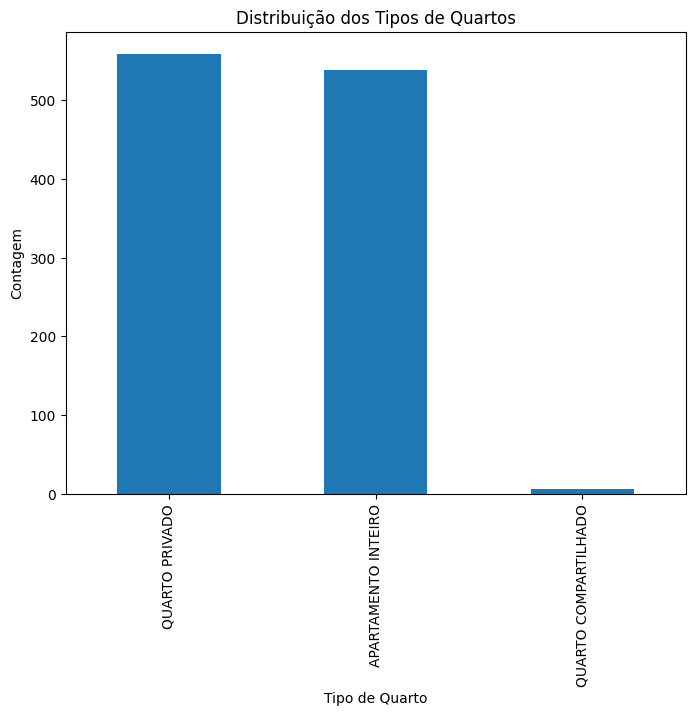

In [ ]:
# Gráfico de Barras
tipo_quarto_counts = df['tipo de quarto'].value_counts()
tipo_quarto_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribuição dos Tipos de Quartos')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Contagem')
plt.show()

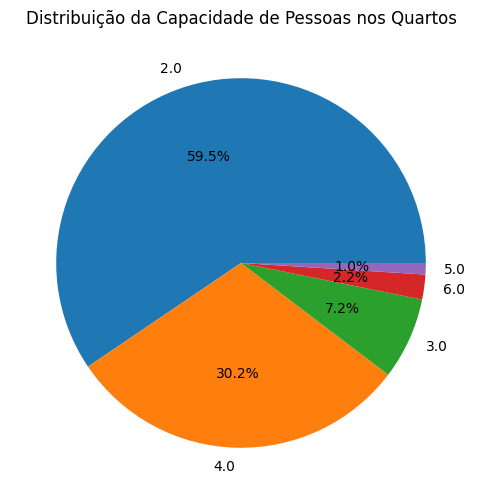

In [ ]:
# Gráfico de Setores
capacidade_pessoas_counts = df['capacidade de pessoas'].value_counts()
capacidade_pessoas_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
plt.title('Distribuição da Capacidade de Pessoas nos Quartos')
plt.ylabel('')
plt.show()

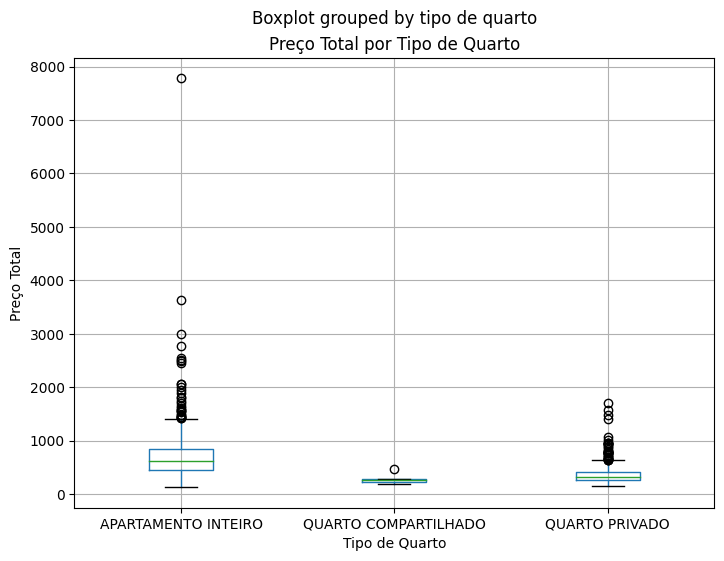

In [ ]:
# Gráfico de Boxplot
df.boxplot(column='total', by='tipo de quarto', figsize=(8, 6))
plt.title('Preço Total por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço Total')
plt.show()

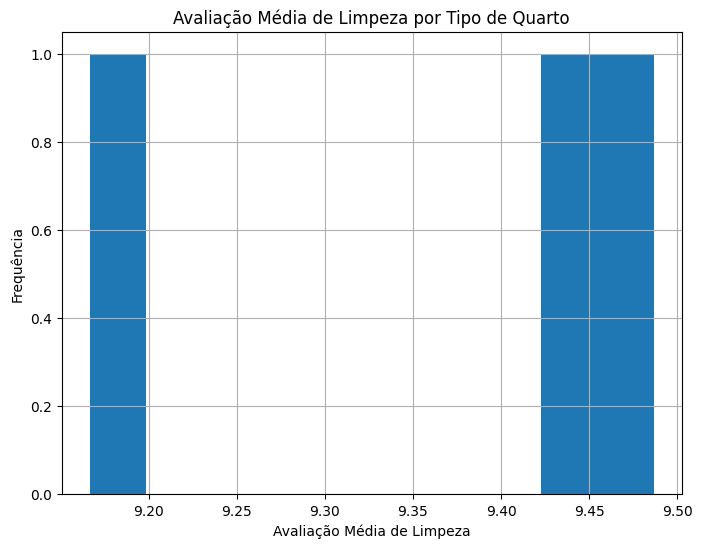

In [ ]:
# Histograma
avaliacao_limpeza_media = df.groupby('tipo de quarto')['avaliação de limpeza'].mean()

plt.figure(figsize=(8, 6))  # Definindo o tamanho da figura
avaliacao_limpeza_media.hist()
plt.title('Avaliação Média de Limpeza por Tipo de Quarto')
plt.xlabel('Avaliação Média de Limpeza')
plt.ylabel('Frequência')
plt.show()

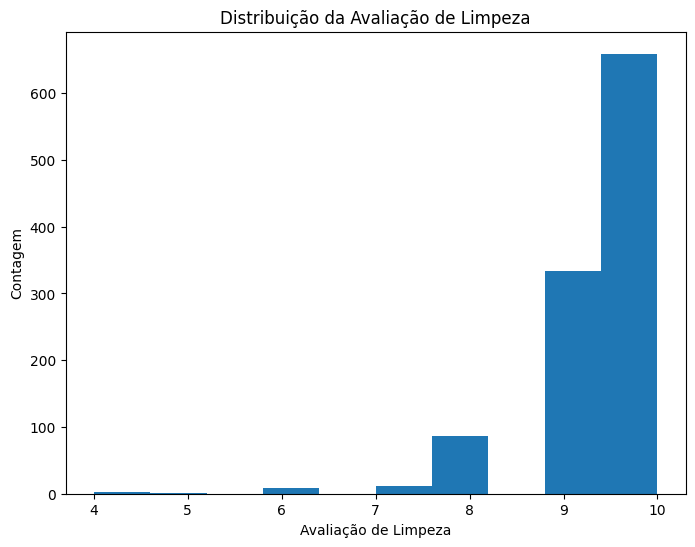

In [ ]:
# Histograma
df['avaliação de limpeza'].plot(kind='hist', bins=10, figsize=(8, 6))
plt.title('Distribuição da Avaliação de Limpeza')
plt.xlabel('Avaliação de Limpeza')
plt.ylabel('Contagem')
plt.show()

**Exportação**

In [ ]:
# Exportação em uma pasta Google Drive
#df.to_csv('',index=False)

In [ ]:
# Exportação no Google Drive. Obs.: ao fechar o colab esse arquivo some. Recomendação: faça o download e coloque numa pasta do google drive
#df.to_csv('', index=False)

In [ ]:
# Google Cloud
# MongoDB

In [ ]:
# Google Cloud
df.to_csv('gs://projeto_airbnb_07_07_2023/Airbnb/Tratado/airbnb_tratado', index=False) # salva no bucket
# gs://projeto_airbnb_07_07_2023/ acessa a bucket
# Cenipa/ é a pasta
# Tratado/ subpasta (obs: pastas e subpastas deverá ser colocadas na sequência, separadas por / até que chegue o próximo passo que é nomear o arquivo.)
# airbnb_tratado/ nome do arquivo que será gravado (o nome é qualquer escolhido)

# **CONCLUSÃO**

* Avaliação de Limpeza: Observo grande volume de avaliações positivas e que se deve manter a qualidade nesse quesito e possivelmente o melhoramento.

* Distância: Não foram encontradas informações relevantes.

* Tipo de Quarto: Criar novas parcerias e formular campanhas com os mesmos para ter mais quartos compartilhados, o cliente teria preços mais acessíveis e a procura iria aumentar, trazendo fluxo e consequentemente mais lucro.

* Os QUARTO PRIVADO e APARTAMENTO INTEIRO, possuem um bom fluxo de procura e disponibilidade.

* Não há correlação em preço total, índice de atrações e o índice de restaurantes. Trabalhar para que haja relação entre eles, valorizando as acomodações e tendo assim, um ganho maior para os proprietários e para a plataforma.

* Sugestão: Criar uma política de valorização da limpeza das acomodações, para que tenham um nível satisfação maior, atraindo mais hóspedes através dos feedbacks positivos.
